In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import spiir.io.ligolw

In [2]:
# Input directories for the simulation runs
# run_dir = Path("/fred/oz996/injection_tests/c2591eae8cb94f3f6d85519e3e79c87f1be00ac4/run2/")
# bg_dir= run_dir / "bg"
# inj_dir = run_dir / "inj"
# non_inj_dir = run_dir / "non_inj"

# for dir in (run_dir, bg_dir, inj_dir, non_inj_dir):
#     assert dir.is_dir()

# paths = list(bg_dir.glob("*/*_zerolag_*.xml.gz"))  # injection_tests

In [3]:
# specify paths to coinc.xml files with postcoh tables
coinc_dir = Path("../data/coinc/")
paths = list(coinc_dir.glob("*.xml"))
paths

[PosixPath('../data/coinc/H1L1_1186642820_386_38.xml'),
 PosixPath('../data/coinc/H1L1_1186643089_412_557.xml')]

In [18]:
df = spiir.io.ligolw.load_postcoh_tables(paths[0], verbose=False)
df

,bankid,chisq_H1,chisq_L1,chisq_V1,cmbchisq,coaphase_H1,coaphase_L1,coaphase_V1,cohsnr,dec,...,snglsnr_V1,spearman_pval,spin1x,spin1y,spin1z,spin2x,spin2y,spin2z,template_duration,tmplt_idx
0,386,2.24946,1.677864,0.0,1.963662,1.918477,1.912692,0.0,8.85786,1.193748,...,0.0,0.0,0.0,0.0,-0.046635,0.0,0.0,0.91011,47.537828,38


In [5]:
data = spiir.io.ligolw.load_postcoh_tables(
    paths,
    columns=["chisq_H1", "chisq_L1", "chisq_V1"],
    verbose=True
)
data

reading '../data/coinc/H1L1_1186642820_386_38.xml' ...


Reading (ligolw): |██████████| 1/1 (100%) ETA 00:00 


reading '../data/coinc/H1L1_1186643089_412_557.xml' ...


Reading (ligolw): |██████████| 2/2 (100%) ETA 00:00 


,chisq_H1,chisq_L1,chisq_V1
0,2.24946,1.677864,0.0
1,1.78429,1.141463,0.0


In [6]:
# specify paths to coinc.xml files with postcoh tables
psd_dir = Path("../data/psd/")
psd_path = list(psd_dir.glob("*.xml"))[0]

In [7]:
# read frequency series PSD as dataframe
ifos = ("H1", "L1", "V1")
psds = {
    ifo: spiir.io.ligolw.load_ligolw_frequency_series(psd_path, instrument=ifo)
    for ifo in ifos
}
psds = pd.DataFrame(psds)
psds

,H1,L1,V1
frequency,,,
0.0000,1.215107e-49,2.043857e-49,3.683476e-45
0.0625,1.001581e-49,2.051245e-49,5.837852e-45
0.1250,8.977003e-50,2.232848e-49,2.707563e-45
0.1875,9.671079e-50,2.310715e-49,1.956734e-45
0.2500,9.439671e-50,2.154056e-49,2.266791e-45
...,...,...,...
8191.7500,4.031580e-52,5.202033e-55,1.825420e-43
8191.8125,3.867713e-52,5.055507e-55,1.848928e-43
8191.8750,3.726882e-52,4.378472e-55,1.661876e-43


In [15]:
# specify paths to coinc.xml files with postcoh tables
snr_dir = Path("../data/snr/")
snr_paths = list(snr_dir.glob("*.xml"))
snr_paths

[PosixPath('../data/snr/H1L1V1_1187006031_3_432.xml')]

In [16]:
# load SNR series (with epoch offset added)
snr_series = spiir.io.ligolw.load_all_ligolw_snr_series(
    snr_paths[0], add_epoch_time=True, ilwdchar_compat=True
)
snr_df = pd.DataFrame(snr_series.values()).T.fillna(np.nan)
snr_df

,H1,L1,V1
time,,,
1.187006e+09,5.090341+2.118321j,N00000000a00000000N,NaN
1.187006e+09,5.324289+0.328001j,N00000000a00000000N,NaN
1.187006e+09,5.157585-1.283667j,N00000000a00000000N,NaN
1.187006e+09,4.674510-3.148629j,N00000000a00000000N,NaN
1.187006e+09,3.096841-4.685825j,N00000000a00000000N,NaN
...,...,...,...
1.187006e+09,N00000000a00000000N,-2.910600-1.514287j,NaN
1.187006e+09,N00000000a00000000N,-3.083956-0.182296j,NaN
1.187006e+09,N00000000a00000000N,-2.673801+0.888132j,NaN


<AxesSubplot:title={'center':'SNR Series'}, xlabel='time'>

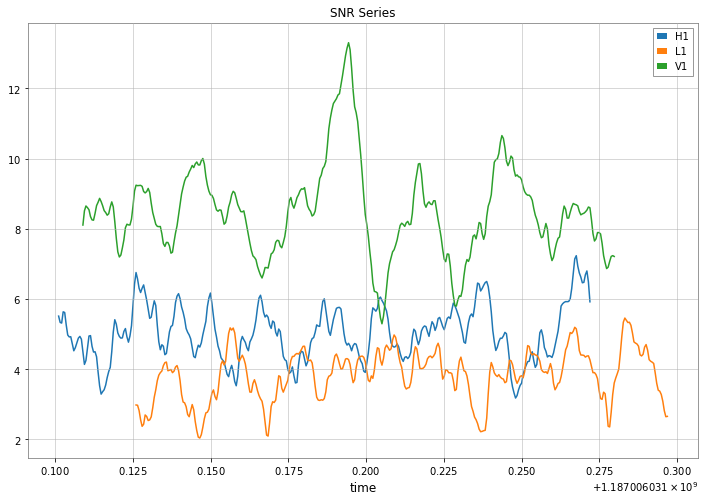

In [17]:
# plot real valued SNR
df = snr_df.apply(lambda snr: np.sqrt(np.real(snr)**2 + np.imag(snr)**2), axis=0)
df.plot(title="SNR Series", figsize=(12,8))